# Stars Dataset - Multiclass Classification Using Logistic Regression, Support Vector Machine, and Random Forest Algorithms

## Purpose:
The purpose for this project is to use machine learning techniques, such as logistical regression, support vector machine, and random forest algorithms to predict multiple classes for a set of data. For this project, in particular, will focus on a dataset set of 240 stars to predict classes of star based on features provided by the dataset and evaluate which technique works best for these predictions. 

## Data Source And Method of Collection
The dataset was collected from kaggle.com, under title "Star dataset to Predict Star Types" from Deepraj Baidya (The link is provided below). Deepraj describe the purpose for this dataset as, "to prove that the star follow a certain graph in th celestial space, called the Hertzsprung-Russell Diagram or otherwise known as the HR-Diagram". According to this link, Deepraj indicated that this dataset took around 3 weeks to collect data on 240 stars and missing data was manually calculated from the following astrophysics equations:

1. Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star)
2. Wienn's Displacement law (for finding surface temperature of a star using wavelength)
3. Absolute magnitude relation
4. Radius of a star using parallax.

#### Dataset: https://www.kaggle.com/deepu1109/star-dataset

#### Other Helpful links for about the equations used:

* Stefan-Boltzmann's Law: http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/stefan.html
* Wienn's Displacement Law: http://hyperphysics.phy-astr.gsu.edu/hbase/wien.html
* Absolute Magnitude Relation: https://en.wikipedia.org/wiki/Absolute_magnitude
* Radius of a star using parallax:https://www.youtube.com/watch?v=FnFkb5Dw5-A

## Key Takeaways from this Project
1. During data clean-up identified spelling, grammar, and non-uniformed related errors in the categorical column for Star Color. Reduced 19 color categories to reflect 7 categories. 
2. Reviewing and comparing each algorithm, the random forest algo. performed the best with an accuracy, precision, and f1-score values of 1.0 (or 100%).
3. The logistical regression algo. performed the second best with an accuracy of ~0.958, precision of ~0.966, and f1-score values > 0.85.
4. The SVC had the worst out of the three, however still performed well. SVC performed with an accuracy of 0.916, a precision value of 0.933 and f1-score values > 0.86.  

## The dataset contains the following column descriptions:
1. Absolute Temperature (in K)
2. Relative Luminosity (L/Lo)
3. Relative Radius (R/Ro)
4. Absolute Magnitude (Mv)
5. Star Color 
6. Spectral Class (O,B,A,F,G,K,,M)
7. Star Type 

#### Note:
* Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
* Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

#### Star Type describes the following 6 types of stars:

* Brown Dwarf &rarr; Star Type = 0
* Red Dwarf &rarr; Star Type = 1
* White Dwarf &rarr; Star Type = 2
* Main Sequence &rarr; Star Type = 3
* Supergiant &rarr; Star Type = 4
* Hypergiant &rarr; Star Type = 5

## Load and Clean the Data

First, we load the data into memory using pandas

In [1]:
import pandas as pd
#loading the Stars dataset
stars = pd.read_csv('Stars.csv', low_memory=False)
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Reviewing the data types and whether the data has any missing information.

In [2]:
stars.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [3]:
stars.isnull().sum(axis=0)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

There is no missing values in all columns. But there are several features are categorical variables. Let's look into it.

## Convert Categorical Features to Numerical Features 

We notice that the following features/columns are not numerical variables that include object and int64.
+ Star type
+ Star Color
+ Spectral Class 

Star type is our label/target, we normally would need to convert it to numerical variable, however in this case it has already been completed. The remaining two will need to be reviewed for errors and have dummy variables created for their respected categories. 

In [4]:
stars['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

In [5]:
stars['Star type'] = stars['Star type'].astype('category')
stars.dtypes

Temperature (K)              int64
Luminosity(L/Lo)           float64
Radius(R/Ro)               float64
Absolute magnitude(Mv)     float64
Star type                 category
Star color                  object
Spectral Class              object
dtype: object

In [6]:
Unique = ['Star color', 'Spectral Class']
stars[Unique].describe(include='all').loc['unique', :]

Star color        19
Spectral Class     7
Name: unique, dtype: object

According to this above information, there are 19 different colors and 7 different spectral classes. Let's delve more into these catergories and see if there are spelling, grammar, or additional errors to address first. If there are any errors detected, we can rename these variables to match or create a equvilent/relatable catergory.

In [7]:
stars['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

So, it looks like there were some spelling/grammar errors and some ambiguity for some colors. Below we will address this issue by creating some new catergorical identifiers.

In [10]:
# Assigning new color identifier for bluish colors
stars['Star color'].replace({'Blue-white':'Bluish',
                             'Blue White':'Bluish',
                             'Blue ':'Bluish',
                             'Blue white':'Bluish',
                             'Blue-White':'Bluish'}, inplace=True)

# Assigning new color identifier for Whitish colors
stars['Star color'].replace({'yellow-white':'Off-White',
                             'Yellowish White':'Off-White',
                             'white':'White',
                            'Whitish':'Off-White'}, inplace=True)

# Assigning new color identifier for Orange, Yellow, and Red colors
stars['Star color'].replace({'Pale yellow orange':'Orange',
                             'White-Yellow':'Yellowish',
                            'yellowish':'Yellowish',
                            'Orange-Red':'Red'}, inplace=True)

In [11]:
stars['Star color'].value_counts()

Red          113
Blue          55
Bluish        42
Off-White     13
White         10
Yellowish      4
Orange         3
Name: Star color, dtype: int64

In [12]:
stars['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Color and Spectral Class are categorical variables that have only finite many cases. Let's convert them to numerical variables. We use get_dummies function by specifying drop_first = True to **reduce the redundant features**.

In [13]:
Star_Features = ['Star color','Spectral Class']
factors = pd.get_dummies(stars[Star_Features],drop_first=True)
factors.head()

,Star color_Bluish,Star color_Off-White,Star color_Orange,Star color_Red,Star color_White,Star color_Yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,1,0


In [14]:
stars = stars.drop(Star_Features,axis=1)
stars = pd.concat([stars,factors],axis=1)
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Bluish,Star color_Off-White,Star color_Orange,Star color_Red,Star color_White,Star color_Yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,1,0,0,0,0,0,0,1,0


# Numerically Summarize the Data

Let's numerically summarize continuous variables in the dataset.

In [15]:
import numpy as np
numerics =['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 
           'Absolute magnitude(Mv)', 'Star color_Bluish',
           'Star color_Off-White','Star color_Orange','Star color_Red',
           'Star color_White', 'Star color_Yellowish', 'Spectral Class_B',
          'Spectral Class_F', 'Spectral Class_G', 'Spectral Class_K', 
          'Spectral Class_M', 'Spectral Class_O']
#summarize it
np.round(stars[numerics].describe(), decimals=4)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Bluish,Star color_Off-White,Star color_Orange,Star color_Red,Star color_White,Star color_Yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
count,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000
mean,10497.4625,107188.3616,237.1578,4.3824,0.1750,0.0542,0.0125,0.4708,0.0417,0.0167,0.1917,0.0708,0.0042,0.0250,0.4625,0.1667
std,9552.4250,179432.2449,517.1558,10.5325,0.3808,0.2268,0.1113,0.5002,0.2002,0.1283,0.3944,0.2571,0.0645,0.1565,0.4996,0.3735
min,1939.0000,0.0001,0.0084,-11.9200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3344.2500,0.0009,0.1028,-6.2325,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,5776.0000,0.0705,0.7625,8.3130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,15055.5000,198050.0000,42.7500,13.6975,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
max,40000.0000,849420.0000,1948.5000,20.0600,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Let's look at the correlation between all these numerical features.

In [17]:
corr=stars.corr()
corr.style.background_gradient(cmap='PuBu')

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Bluish,Star color_Off-White,Star color_Orange,Star color_Red,Star color_White,Star color_Yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.301424,-0.066633,-0.063838,-0.711432,-0.017000,-0.072749,0.463676,-0.057368,-0.024751,-0.100755,-0.704541,0.553433
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,-0.102692,-0.143245,0.179795,-0.248634,-0.015075,-0.077934,-0.078889,-0.165280,0.044004,0.040074,-0.237086,0.557902
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,-0.049781,-0.109472,0.163618,0.080185,0.006606,-0.059650,-0.033152,-0.126585,0.154147,0.073935,0.066032,0.017883
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.096008,0.020542,-0.058222,0.337449,0.086171,0.043583,-0.030567,0.111102,-0.088944,-0.062693,0.351736,-0.467128
Star color_Bluish,0.301424,-0.102692,-0.049781,-0.096008,1.000000,-0.110218,-0.051818,-0.434440,-0.096035,-0.059961,0.611517,-0.127164,-0.029792,-0.073750,-0.427227,-0.205971
Star color_Off-White,-0.066633,-0.143245,-0.109472,0.020542,-0.110218,1.000000,-0.026924,-0.225734,-0.049899,-0.031155,-0.069762,0.723227,-0.015480,-0.038320,-0.221986,-0.107022
Star color_Orange,-0.063838,0.179795,0.163618,-0.058222,-0.051818,-0.026924,1.000000,-0.106126,-0.023460,-0.014647,-0.054785,0.115120,-0.007278,0.222195,-0.029147,-0.050315
Star color_Red,-0.711432,-0.248634,0.080185,0.337449,-0.434440,-0.225734,-0.106126,1.000000,-0.196686,-0.122804,-0.459320,-0.260441,0.068575,-0.044110,0.966656,-0.421844
Star color_White,-0.017000,-0.015075,0.006606,0.086171,-0.096035,-0.049899,-0.023460,-0.196686,1.000000,-0.027146,-0.101535,0.267538,-0.013488,-0.033389,-0.193421,-0.093250
Star color_Yellowish,-0.072749,-0.077934,-0.059650,0.043583,-0.059961,-0.031155,-0.014647,-0.122804,-0.027146,1.000000,-0.063395,0.090921,-0.008421,0.604560,-0.120765,-0.058222


## Graphically Summarize the Data
Let's summarize the numerical features graphically.

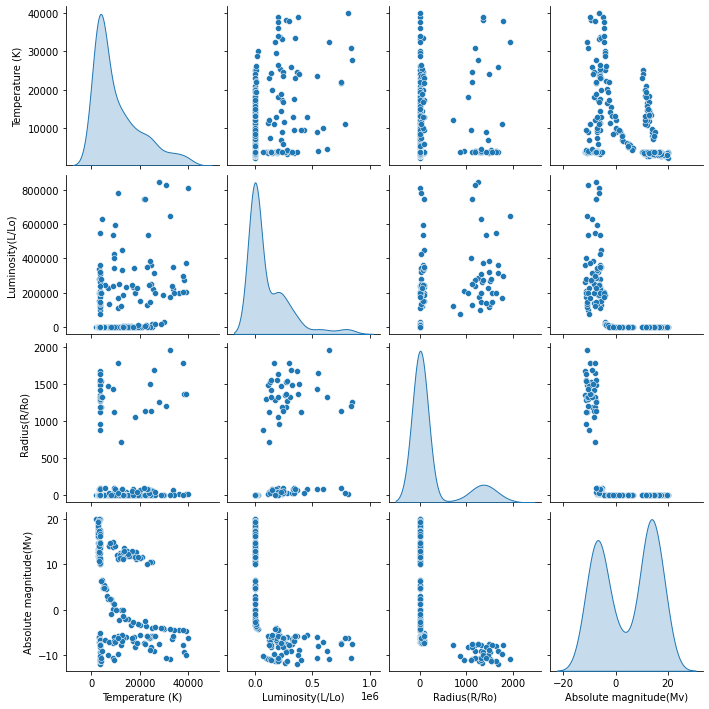

In [18]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

sns.pairplot(stars[['Temperature (K)','Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']], 
             diag_kind='kde')

<AxesSubplot:xlabel='Star type', ylabel='Temperature (K)'>

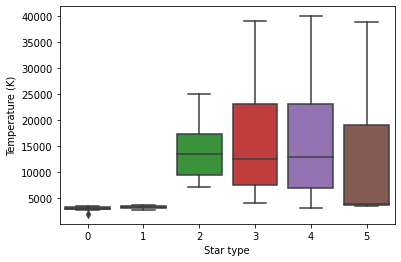

In [19]:
sns.boxplot(x='Star type',y='Temperature (K)',data=stars)

<AxesSubplot:xlabel='Star type', ylabel='Luminosity(L/Lo)'>

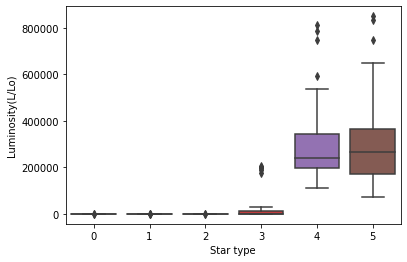

In [20]:
sns.boxplot(x='Star type',y='Luminosity(L/Lo)',data=stars)

<AxesSubplot:xlabel='Star type', ylabel='Radius(R/Ro)'>

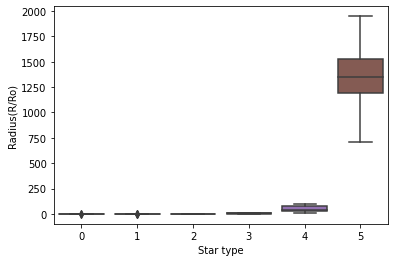

In [21]:
sns.boxplot(x='Star type',y='Radius(R/Ro)',data=stars)

<AxesSubplot:xlabel='Star type', ylabel='Absolute magnitude(Mv)'>

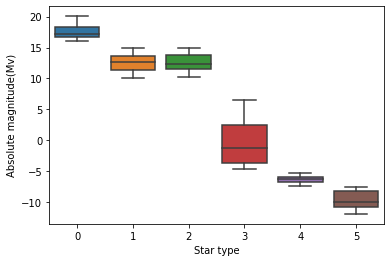

In [22]:
sns.boxplot(x='Star type',y='Absolute magnitude(Mv)',data=stars)

## Split the Data Into Training and Test Data Set

Before I split the data into a 80/20 split, I need to reduce the size of the data to reduce the time it will take to train later on. Afterwards I will need first to combine all features into $X$ and select the label column as $y$.

In [23]:
X = stars.drop('Star type',axis=1)
y = stars['Star type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 0, stratify=y)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 192
Test cases: 48


In [24]:
y_test.value_counts()

0    8
1    8
2    8
3    8
4    8
5    8
Name: Star type, dtype: int64

In [25]:
y_train.value_counts()

0    32
1    32
2    32
3    32
4    32
5    32
Name: Star type, dtype: int64

### Train and evaluate a multiclass classifier

Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model. Most scikit-learn classification algorithms inherently support multiclass classification. We'll try a logistic regression algorithm.

In [26]:
from sklearn.linear_model import LogisticRegression
reg = 0.1
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', 
                                 multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


In [27]:
predictions = multi_model.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [4 4 2 4 4 1 0 2 4 1 0 0 1 3 2]
Actual labels   :  42     4
228    4
24     2
109    4
43     4
191    1
188    0
23     2
214    3
10     1
0      0
6      0
70     1
98     3
82     2
Name: Star type, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]


In [28]:
from sklearn. metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      0.75      0.86         8
           4       0.80      1.00      0.89         8
           5       1.00      1.00      1.00         8

    accuracy                           0.96        48
   macro avg       0.97      0.96      0.96        48
weighted avg       0.97      0.96      0.96        48



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9583333333333334
Overall Precision: 0.9666666666666667
Overall Recall: 0.9583333333333334


In [30]:
from sklearn.metrics import confusion_matrix

mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 6 2 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 8]]


In [31]:
classes = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

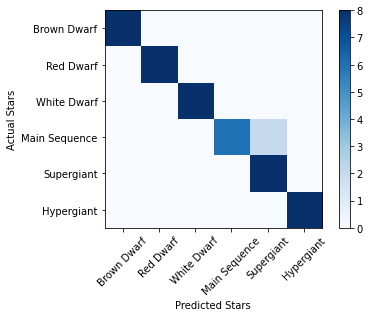

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Stars")
plt.ylabel("Actual Stars")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

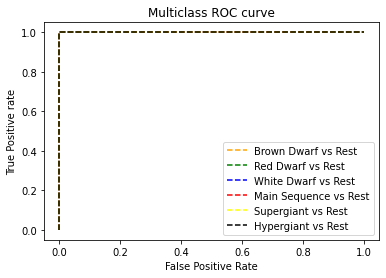

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prob = multi_model.predict_proba(X_test)

fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label=classes[3] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='yellow', label=classes[4] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='black', label=classes[5] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [34]:
auc = roc_auc_score(y_test,prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9656250000000001


## Preprocess data in a pipeline

Using a pipeline to apply preprocessing steps to the data before fitting it to an algorithm to train a model. Let's see if we can improve the predictor by scaling the numeric features in a transformation steps before training. We'll also try a different algorithm (a support vector machine), just to show that we can!

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(X_train, y_train)
print (multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', SVC(probability=True))])


Now we can evaluate the new model.

Overall Accuracy: 0.9166666666666666
Overall Precision: 0.9333333333333332
Overall Recall: 0.9166666666666666
Average AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.75      0.86         8
           3       1.00      0.75      0.86         8
           4       0.80      1.00      0.89         8
           5       1.00      1.00      1.00         8

    accuracy                           0.92        48
   macro avg       0.93      0.92      0.92        48
weighted avg       0.93      0.92      0.92        48



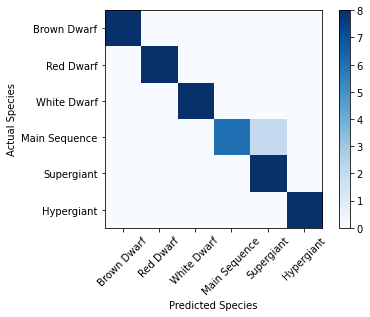

In [36]:
predictions = multi_model.predict(X_test)
prob = multi_model.predict_proba(X_test)

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test, prob, multi_class='ovr'))
print(classification_report(y_test, predictions))

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

Now, let's give a Random Forest Algorithm a chance.

In [37]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('logregressor', RandomForestClassifier())])


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



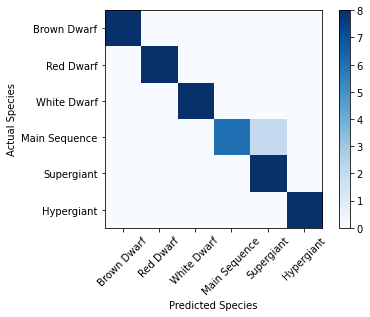

In [38]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test, prob, multi_class='ovr'))
print(classification_report(y_test, predictions))

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

## Conclusion:

Reviewing and comparing each algorithm, the random forest algo. performed the best with an accuracy, precision, and f1-score values of 1.0 (or 100%). While the logistical regression algo. performed the second best with an accuracy of ~0.958, precision of ~0.966, and f1-score values > 0.85. The SVC had the worst out of the three, however still performed well. SVC performed with an accuracy of 0.916, a precision value of 0.933 and f1-score values > 0.86. These values, of course were trained on a small dataset and may or not be effective at predicting larger datasets. This of course can be resolved by reviewing the cleaning data steps, identifying potential errors, rerunning the algorithms, and identifying which algo. worked the best. 